# Post Modeling Visuals Based on Modeling Results

# Import Packages

In [1]:
import pandas as pd
import numpy as np

# Import Data

In [2]:
master_df = pd.read_csv("C:/Users/johne/Downloads/IWC_Work_Orders_Extract.csv")


C:\Users\johne\AppData\Local\Temp\ipykernel_7564\2529462873.py:1: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  master_df = pd.read_csv("C:/Users/johne/Downloads/IWC_Work_Orders_Extract.csv")


# Data Cleaning (Same as Modeling)

In [3]:
# Cleaning the data by droppping columns that have any Colinearity or columns with slim to no data.

df_col_drop_lasso=master_df.drop(['ORDER_ID','PLANT_ID', 'FUNCTIONAL_AREA_NODE_1_MODIFIED',
                                   'FUNCTIONAL_AREA_NODE_2_MODIFIED', 'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED',
                                   'FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIP_VALID_TO', 'EXECUTION_START_DATE',
                                   'EXECUTION_FINISH_DATE', 'EQUIP_START_UP_DATE', 'EQUIP_VALID_FROM', 'EQUIP_VALID_TO', 'ACTUAL_START_TIME', 'ACTUAL_FINISH_TIME'],axis=1)

# Dropping rows with NaN values that wont work within the lasso regression

df_filtered_lasso = df_col_drop_lasso.dropna(subset=['ORDER_DESCRIPTION', 'MAINTENANCE_PLAN', 'MAINTENANCE_ITEM','MAINTENANCE_TYPE_DESCRIPTION', 'FUNCTIONAL_LOC', 'EQUIPMENT_ID'], how='all')

df_filtered_lasso.isnull().sum()/len(df_filtered_lasso)

PRODUCTION_LOCATION             0.000000
ACTUAL_WORK_IN_MINUTES          0.000000
MAINTENANCE_PLAN                0.477051
MAINTENANCE_ITEM                0.477051
MAINTENANCE_ACTIVITY_TYPE       0.000000
ORDER_DESCRIPTION               0.000096
MAINTENANCE_TYPE_DESCRIPTION    0.000000
FUNCTIONAL_LOC                  0.000045
EQUIPMENT_ID                    0.000000
EQUIPMENT_DESC                  0.727730
EQUIP_CAT_DESC                  0.727730
dtype: float64

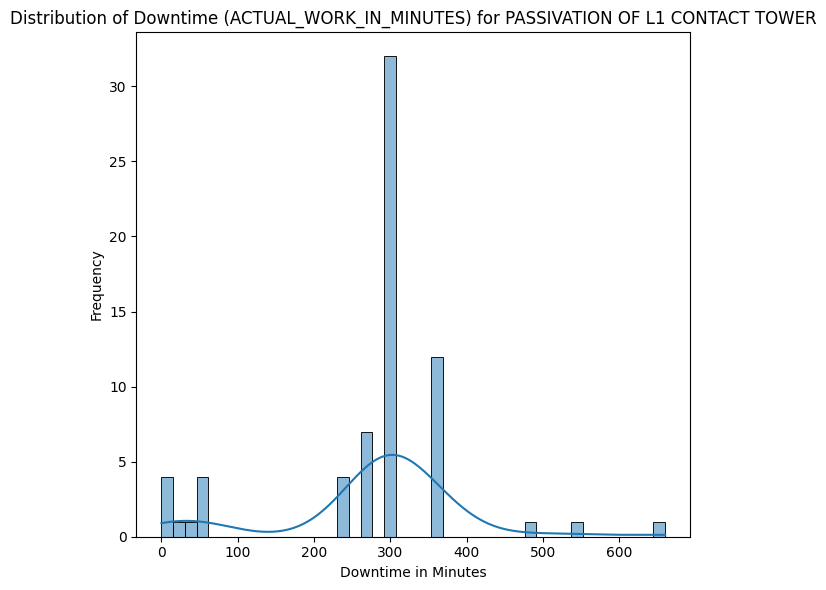

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset for the specific ORDER_DESCRIPTION
feature_name = "PASSIVATION OF L1 CONTACT TOWER"
df_feature = df_filtered_lasso[df_filtered_lasso['ORDER_DESCRIPTION'] == feature_name]

# Plotting
plt.figure(figsize=(12, 6))

# Distribution Plot for Downtime (ACTUAL_WORK_IN_MINUTES)
plt.subplot(1, 2, 2)
sns.histplot(df_feature['ACTUAL_WORK_IN_MINUTES'], kde=True)
plt.title(f'Distribution of Downtime (ACTUAL_WORK_IN_MINUTES) for {feature_name}')
plt.xlabel('Downtime in Minutes')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


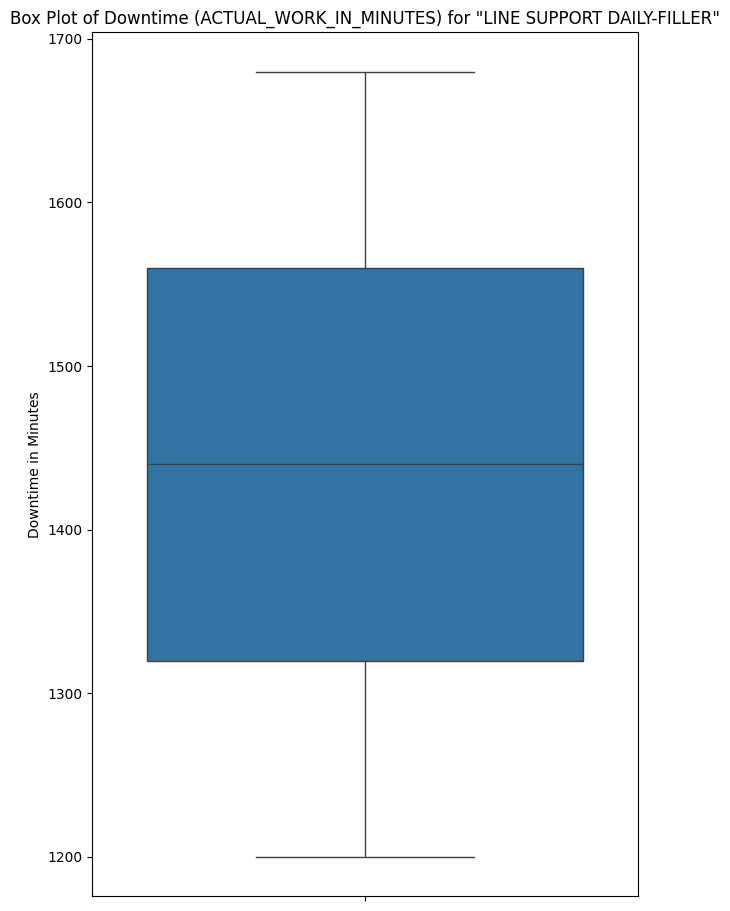

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe for the specific ORDER_DESCRIPTION
feature_name = "LINE SUPPORT DAILY-FILLER"
df_feature = df_filtered_lasso[df_filtered_lasso['ORDER_DESCRIPTION'] == feature_name]

# Set up the plots
plt.figure(figsize=(12, 18))



# Box Plot for Downtime
plt.subplot(2, 2, 2)
sns.boxplot(y=df_feature['ACTUAL_WORK_IN_MINUTES'])
plt.title(f'Box Plot of Downtime (ACTUAL_WORK_IN_MINUTES) for "{feature_name}"')
plt.ylabel('Downtime in Minutes')



# Display all plots
plt.tight_layout()
plt.show()


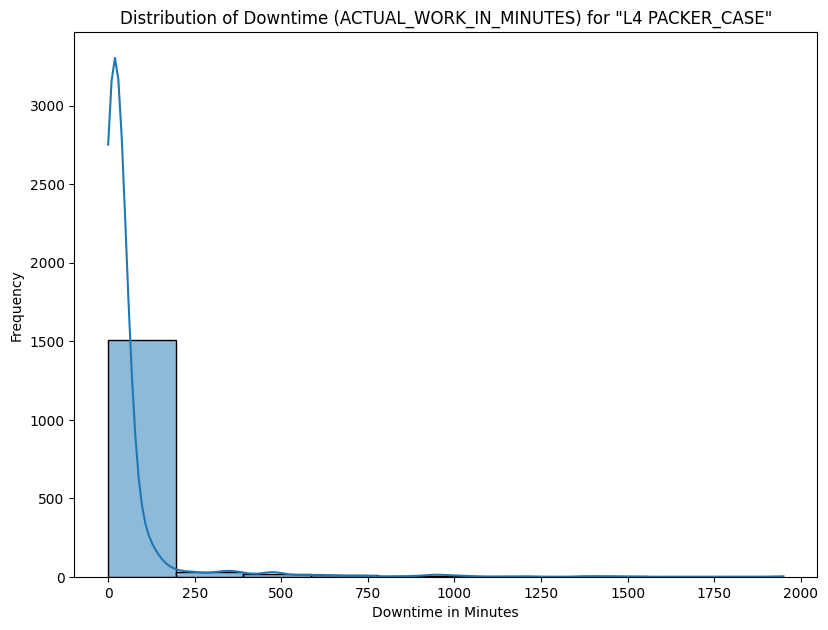

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe for the specific EQUIPMENT_DESC
feature_name = "L4 PACKER_CASE"
df_feature = df_filtered_lasso[df_filtered_lasso['EQUIPMENT_DESC'] == feature_name]

# Set up the plots
plt.figure(figsize=(16, 12))


# Histogram with KDE for Downtime
plt.subplot(2, 2, 4)
sns.histplot(df_feature['ACTUAL_WORK_IN_MINUTES'], kde=True, bins=10)
plt.title(f'Distribution of Downtime (ACTUAL_WORK_IN_MINUTES) for "{feature_name}"')
plt.xlabel('Downtime in Minutes')
plt.ylabel('Frequency')

# Display all plots
plt.tight_layout()
plt.show()


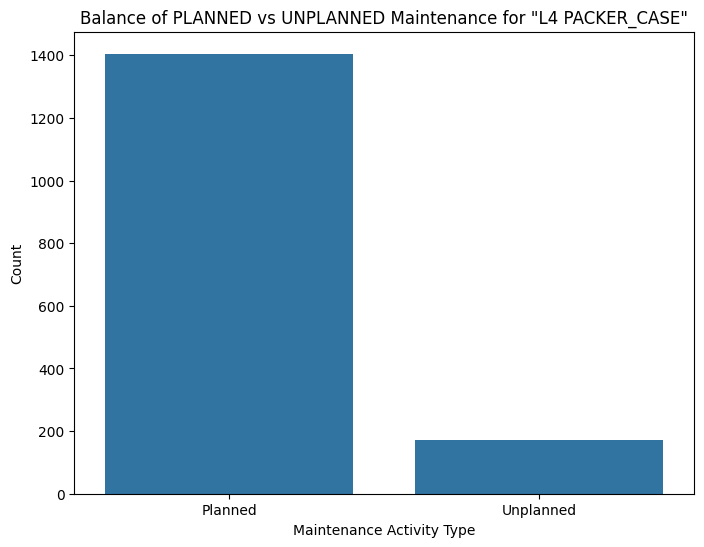

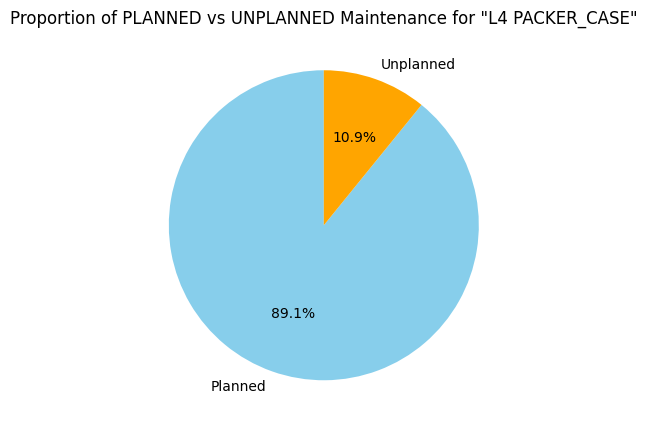

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataframe for the specific EQUIPMENT_DESC
feature_name = "L4 PACKER_CASE"
df_feature = df_filtered_lasso[df_filtered_lasso['EQUIPMENT_DESC'] == feature_name]

# Count of PLANNED vs UNPLANNED maintenance
maintenance_counts = df_feature['MAINTENANCE_ACTIVITY_TYPE'].value_counts()

# Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=maintenance_counts.index, y=maintenance_counts.values)
plt.title(f'Balance of PLANNED vs UNPLANNED Maintenance for "{feature_name}"')
plt.xlabel('Maintenance Activity Type')
plt.ylabel('Count')
plt.show()

# Pie Chart
plt.figure(figsize=(5, 7))
plt.pie(maintenance_counts.values, labels=maintenance_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title(f'Proportion of PLANNED vs UNPLANNED Maintenance for "{feature_name}"')
plt.show()


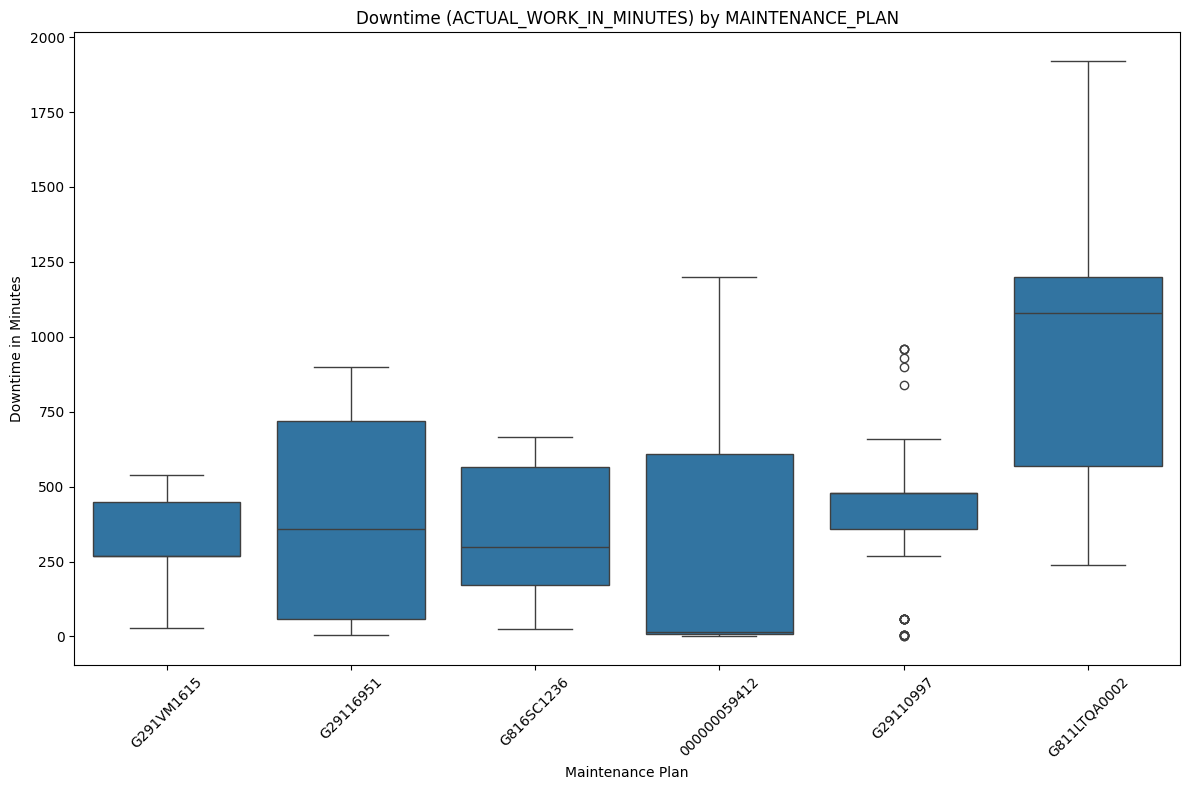

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of maintenance plans to visualize
maintenance_plans = [
    "G291VM1615",
    "G29116951",
    "G816SC1236",
    "000000059412",
    "G29110997",
    "G811LTQA0002"
]

# Filter the dataframe for the specified maintenance plans
df_filtered = df_filtered_lasso[df_filtered_lasso['MAINTENANCE_PLAN'].isin(maintenance_plans)]

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='MAINTENANCE_PLAN', y='ACTUAL_WORK_IN_MINUTES', data=df_filtered, order=maintenance_plans)
plt.title('Downtime (ACTUAL_WORK_IN_MINUTES) by MAINTENANCE_PLAN')
plt.xlabel('Maintenance Plan')
plt.ylabel('Downtime in Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
